In [1]:
import numpy as np
from  cv2 import imread
import matplotlib.pyplot as plt

In [2]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))


def imhist(X):
  (N,M) = X.shape
  n = 256
  h = np.zeros((256,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  plt.figure(figsize=(60,9))
  plt.bar(range(n),h[0:n])
  plt.show()


In [3]:
# equalizacion que fuerza al histograma de salida ser uniforme
def hist_forceuni(img):

    img_x = img.copy()
    img_x = 255 * ((img_x - img_x.min()) / (img_x.max() - img_x.min())) 

    n, m = img_x.shape
    y = np.zeros((n * m, 1), dtype=np.uint8)
    j = np.argsort(img_x.flatten())
    z = np.zeros((n * m, 1), dtype=np.uint8)
    d = np.int64(np.fix((n * m / 256) + 0.5))

    for i in range(255):
        z[i * d:(i + 1) * d] = i * np.ones((d, 1))  # , dtype=np.uint8)
    z[255 * d:n * m] = 255 * np.ones((n * m - 255 * d, 1))  # , dtype=np.uint8)

    y[j] = z
    y = y.reshape(n, m)

    return y


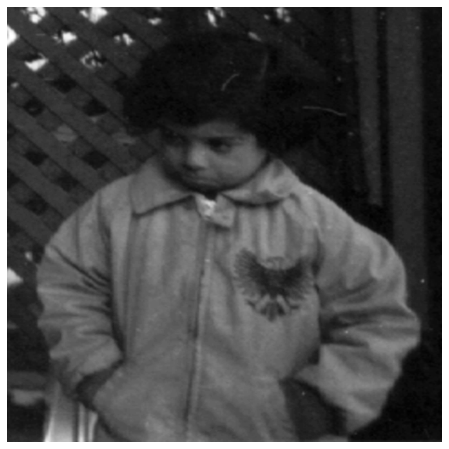

size =  (512, 512)
max  =  224
min  =  74


In [25]:
X0 = imread('pout.png',0)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(X0,cmap='gray')
plt.show()
howis(X0)

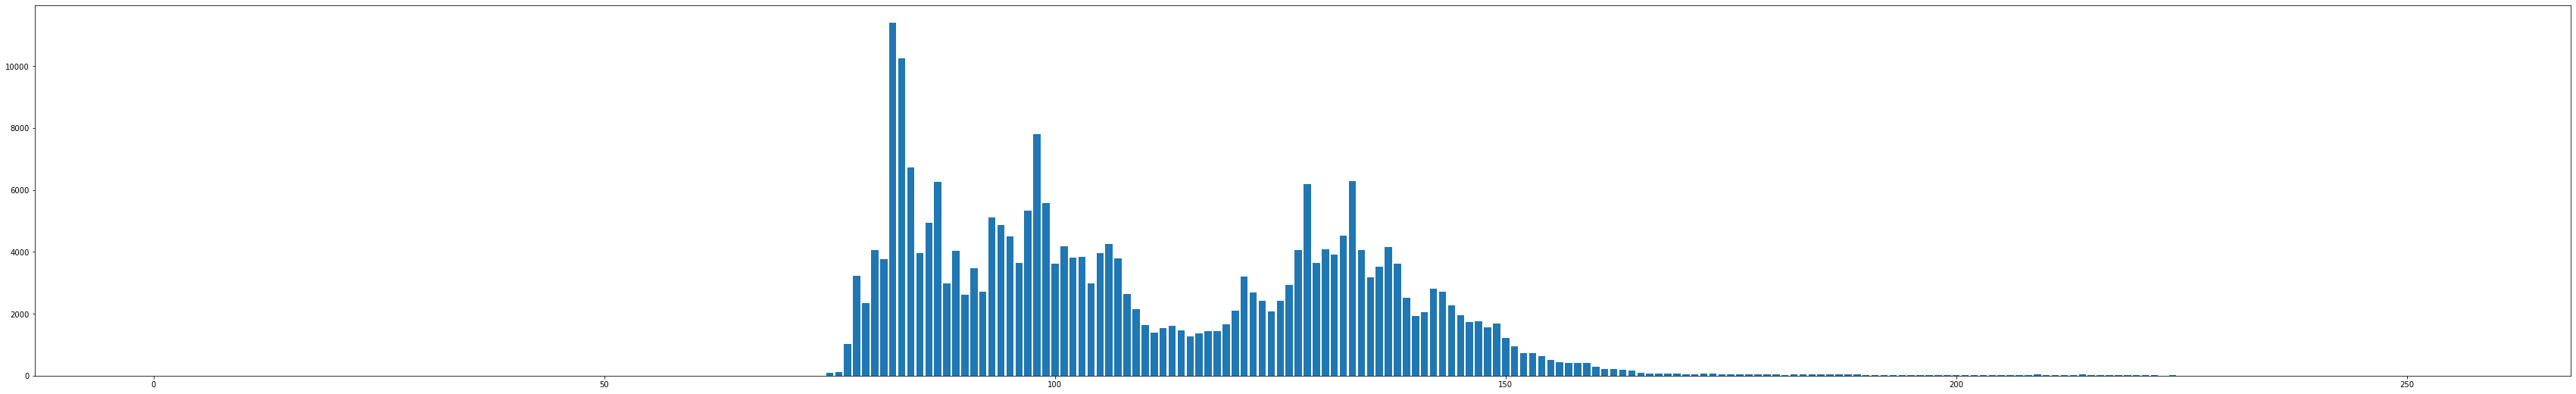

In [15]:
imhist(X0)

size =  (512, 512)
max  =  255
min  =  0


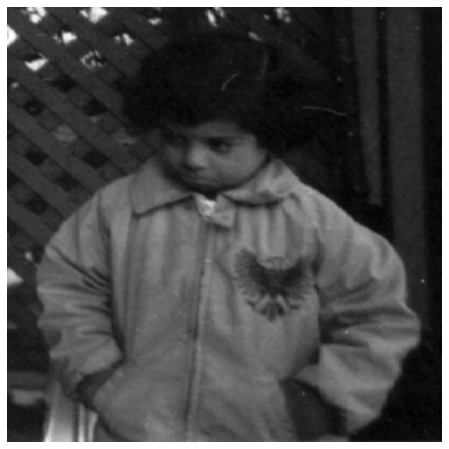

In [26]:
X1 = X0.copy()
X1 = 255 * ((X1 - X1.min()) / (X1.max() - X1.min()))
X1 = X1.astype(np.uint8)
howis(X1)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(X1,cmap='gray')

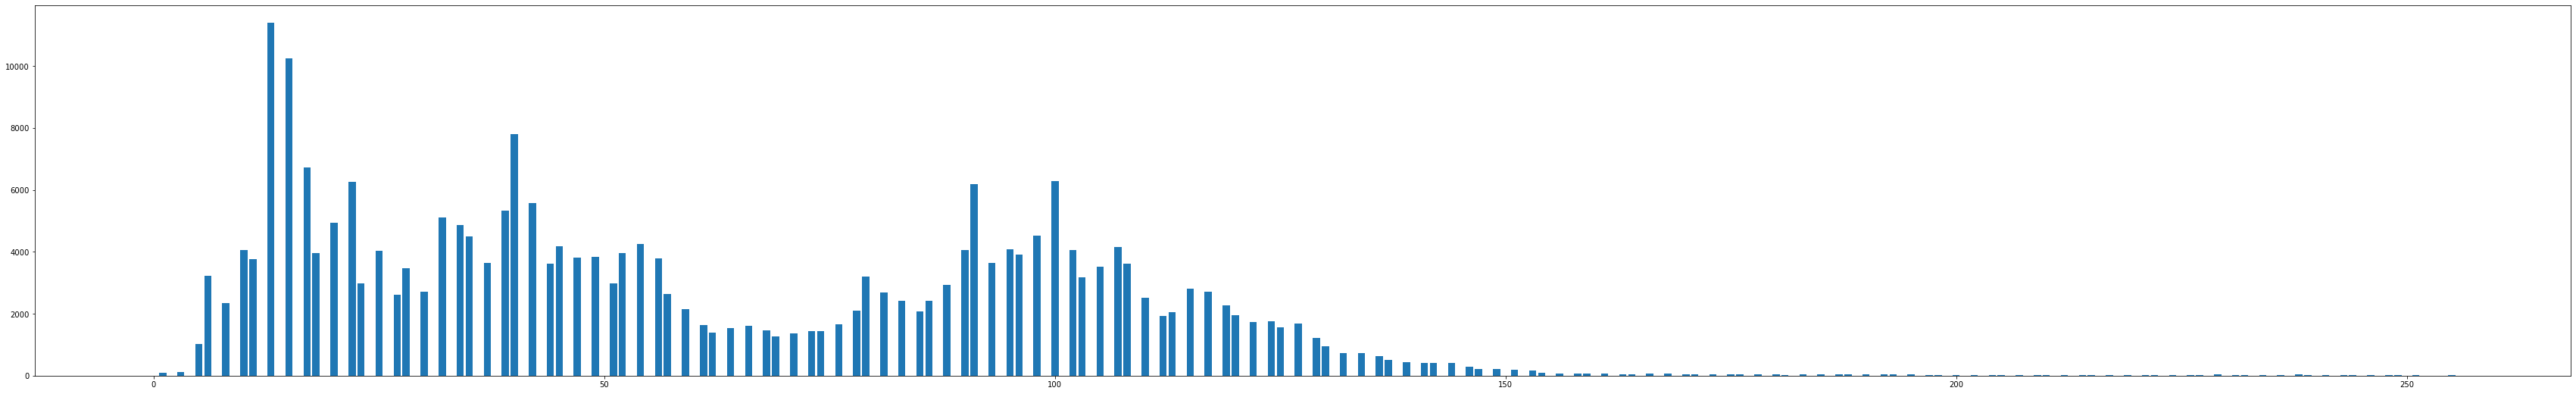

In [17]:
imhist(X1)

size =  (512, 512)
max  =  255
min  =  0


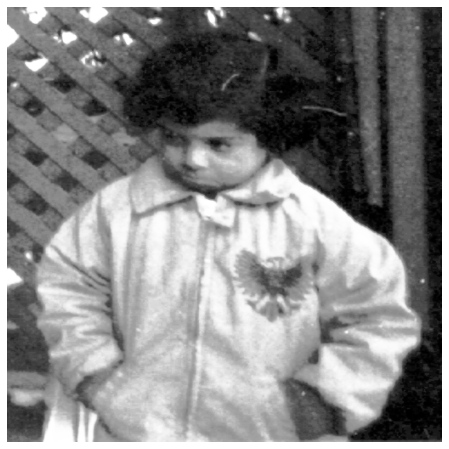

In [27]:
X2 = hist_forceuni(X0)
howis(X2)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(X2,cmap='gray')

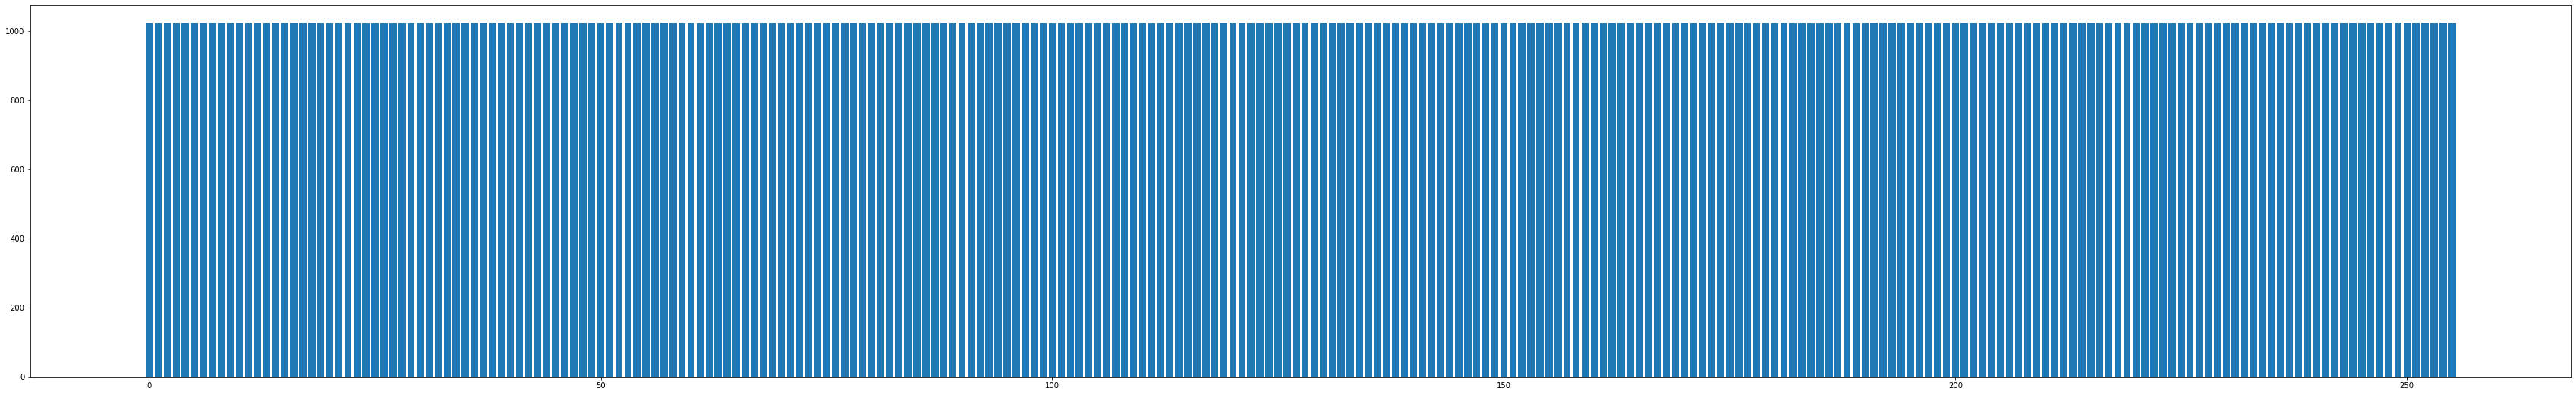

In [19]:
imhist(X2)

Ver implementación [from skratch](https://medium.com/hackernoon/histogram-equalization-in-python-from-scratch-ebb9c8aa3f23)

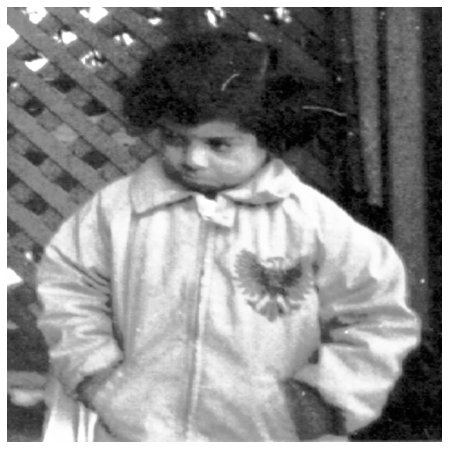

In [28]:
from cv2 import equalizeHist 
X3 = equalizeHist(X0)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(X3,cmap='gray')

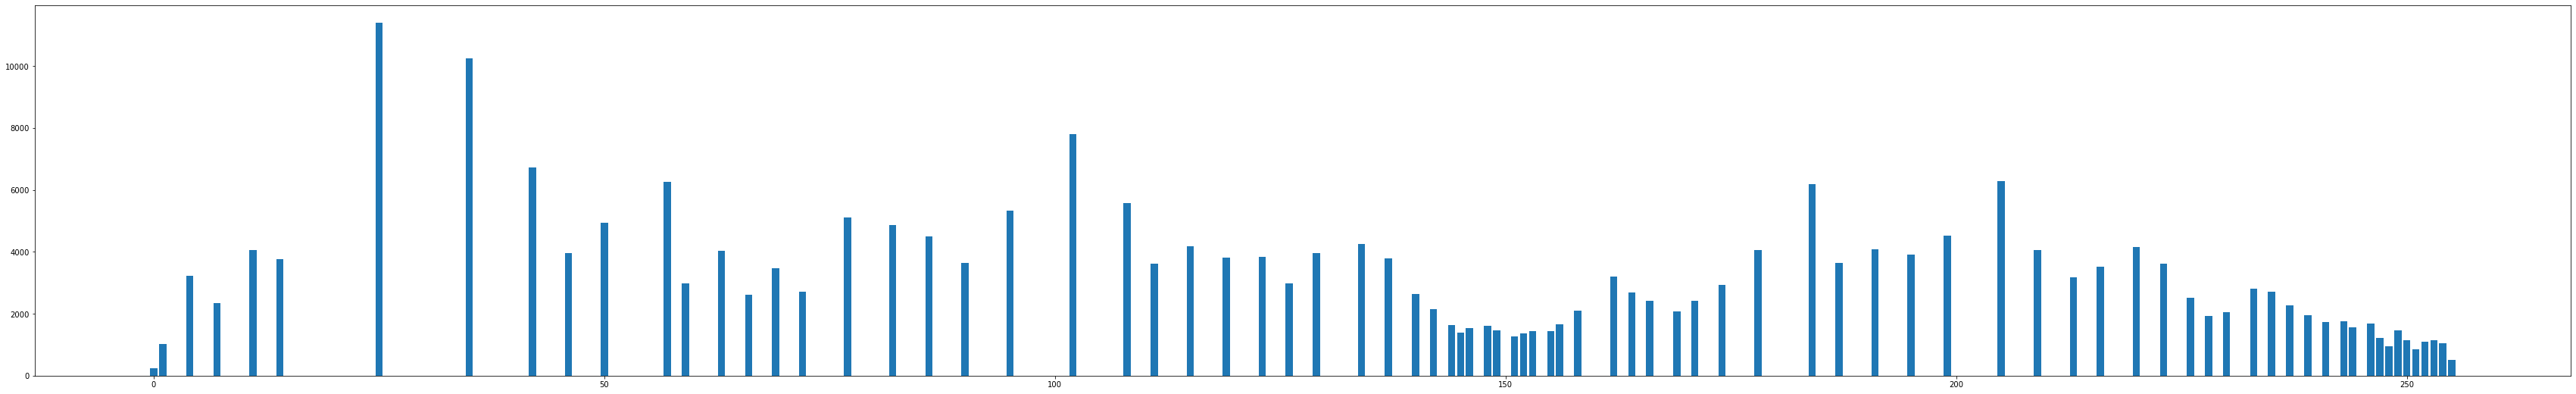

In [23]:
imhist(X3)

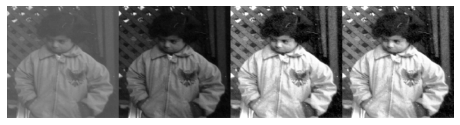

In [32]:
Y = np.hstack((X0,X1,X2,X3))
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(Y,cmap='gray')
# original, expanded, uni-forced, not-uniforced